In [ ]:
import pandas as pd
from datetime import datetime


csv_path = r"C:\Users\rouat\Desktop\MMcows\Datasets\visual_data\visual_data\visual_location\C01\C01_0725.csv"

df = pd.read_csv(csv_path)

print(df.head())


      timestamp  loc_x_cm  loc_y_cm  loc_z_cm
0  1.690272e+09    -797.0    -571.0      87.0
1  1.690272e+09    -790.0    -558.0      82.0
2  1.690272e+09    -802.0    -580.0     102.0
3  1.690272e+09    -791.0    -571.0      85.0
4  1.690272e+09    -794.0    -570.0      82.0


In [ ]:
num_rows = len(df)
print(f"Nombre total de lignes : {num_rows}")

missing_values = df.isnull().sum()
print("\nValeurs manquantes par colonne :")
print(missing_values)

num_duplicates = df.duplicated().sum()
print(f"\nNombre de lignes dupliquées : {num_duplicates}")

Nombre total de lignes : 5040

Valeurs manquantes par colonne :
timestamp      0
loc_x_cm     324
loc_y_cm     324
loc_z_cm     324
dtype: int64

Nombre de lignes dupliquées : 0


In [ ]:
# Chercher le timestamp minimum et maximum
min_timestamp = df['timestamp'].min()
max_timestamp = df['timestamp'].max()

min_datetime = datetime.utcfromtimestamp(min_timestamp)
max_datetime = datetime.utcfromtimestamp(max_timestamp)

print(f"Timestamp minimum : {min_timestamp} → {min_datetime}")
print(f"Timestamp maximum : {max_timestamp} → {max_datetime}")

Timestamp minimum : 1690271846.0 → 2023-07-25 07:57:26
Timestamp maximum : 1690347431.0 → 2023-07-26 04:57:11


C:\Users\rouat\AppData\Local\Temp\ipykernel_24260\1944962639.py:6: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  min_datetime = datetime.utcfromtimestamp(min_timestamp)
C:\Users\rouat\AppData\Local\Temp\ipykernel_24260\1944962639.py:7: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  max_datetime = datetime.utcfromtimestamp(max_timestamp)


In [ ]:
# Extraire et trier les timestamps uniques
unique_timestamps = sorted(df['timestamp'].unique())

intervals = pd.Series(unique_timestamps).diff().dropna()

unique_intervals = sorted(intervals.unique())

print("Valeurs uniques des intervalles entre timestamps (en secondes) :")
print(unique_intervals)

Valeurs uniques des intervalles entre timestamps (en secondes) :
[15.0]


Statistiques descriptives :
          loc_x_cm     loc_y_cm     loc_z_cm
count  4716.000000  4716.000000  4716.000000
mean     56.335030  -182.813613    66.834606
std     340.681646   201.007607    17.928129
min    -830.000000  -624.000000    40.000000
25%    -198.000000  -174.000000    54.000000
50%     135.000000  -126.000000    58.000000
75%     263.000000  -113.000000    78.000000
max     940.000000   570.000000   142.000000


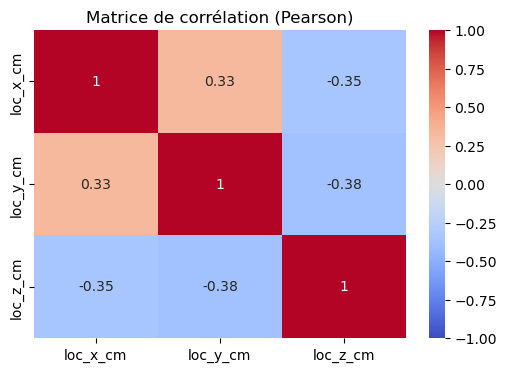

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#  statistiques descriptives
cols = ['loc_x_cm', 'loc_y_cm', 'loc_z_cm']
stats = df[cols].describe()
print("Statistiques descriptives :")
print(stats)

# matrice de corrélation
correlation = df[cols].corr(method='pearson')

# Afficher la heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matrice de corrélation (Pearson)')
plt.show()

Unique behaviors: [4 3 1 2 6 7 0]


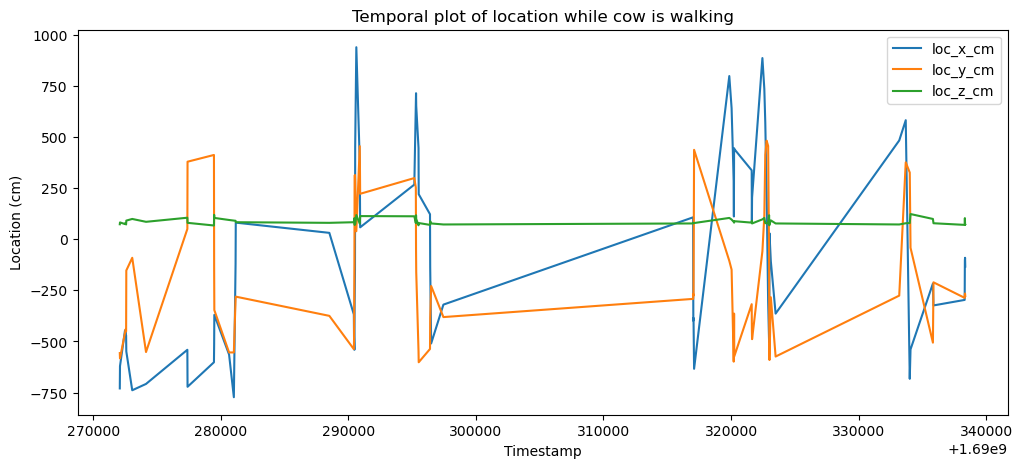

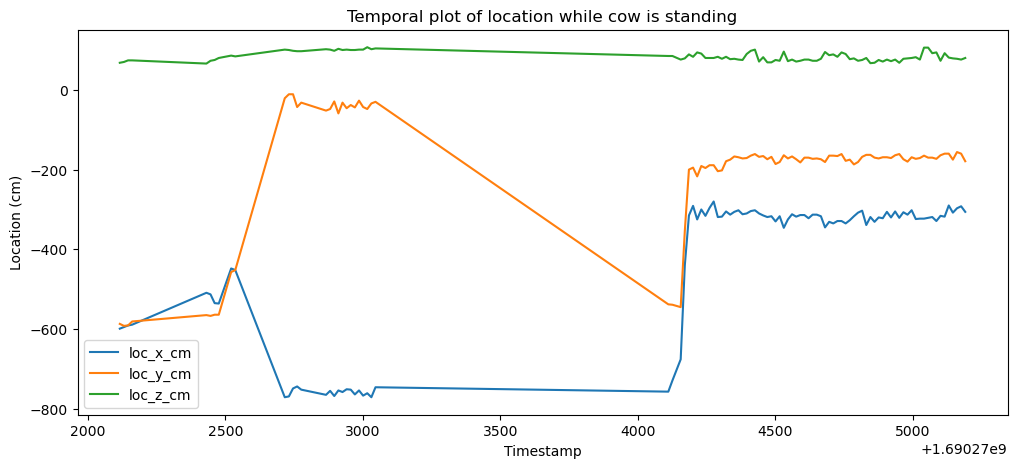

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

location_path = r"C:\Users\rouat\Desktop\MMcows\Datasets\visual_data\visual_data\visual_location\C01\C01_0725.csv"
behavior_path = r"C:\Users\rouat\Desktop\MMcows\Datasets\visual_data\visual_data\behavior_labels\individual\C01_0725.csv"

df_location = pd.read_csv(location_path)
df_behavior = pd.read_csv(behavior_path)

# Fusionner sur 'timestamp'
df = pd.merge(df_location, df_behavior[['timestamp', 'behavior']], on='timestamp', how='inner')

print("Unique behaviors:", df['behavior'].unique())

df_walking = df[df['behavior'] == 1]

walking_sample = df_walking.iloc[:100]

plt.figure(figsize=(12, 5))
plt.plot(walking_sample['timestamp'], walking_sample['loc_x_cm'], label='loc_x_cm')
plt.plot(walking_sample['timestamp'], walking_sample['loc_y_cm'], label='loc_y_cm')
plt.plot(walking_sample['timestamp'], walking_sample['loc_z_cm'], label='loc_z_cm')
plt.title('Temporal plot of location while cow is walking')
plt.xlabel('Timestamp')
plt.ylabel('Location (cm)')
plt.legend()
plt.show()


df_standing = df[df['behavior'] == 2]

standing_sample = df_standing.iloc[:100]

# Tracer
plt.figure(figsize=(12, 5))
plt.plot(standing_sample['timestamp'], standing_sample['loc_x_cm'], label='loc_x_cm')
plt.plot(standing_sample['timestamp'], standing_sample['loc_y_cm'], label='loc_y_cm')
plt.plot(standing_sample['timestamp'], standing_sample['loc_z_cm'], label='loc_z_cm')
plt.title('Temporal plot of location while cow is standing')
plt.xlabel('Timestamp')
plt.ylabel('Location (cm)')
plt.legend()
plt.show()


Walking interval length: 2 rows


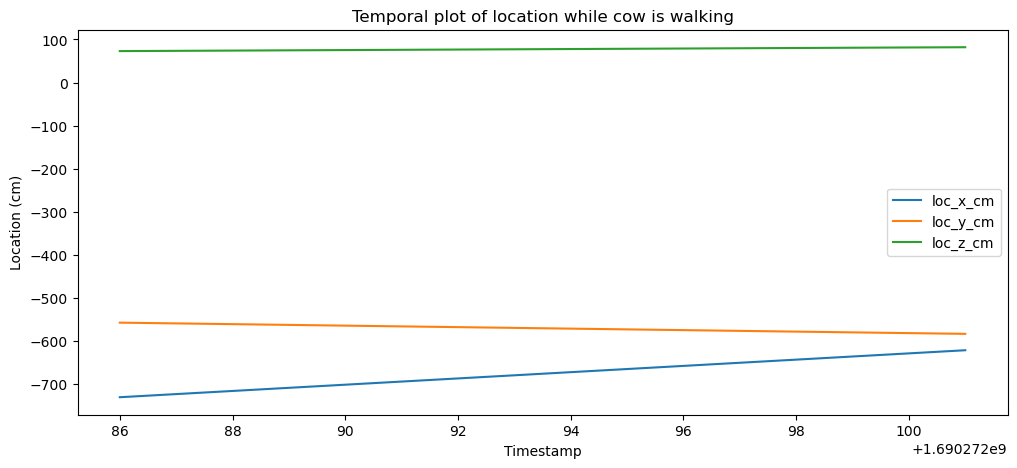

Standing interval length: 4 rows


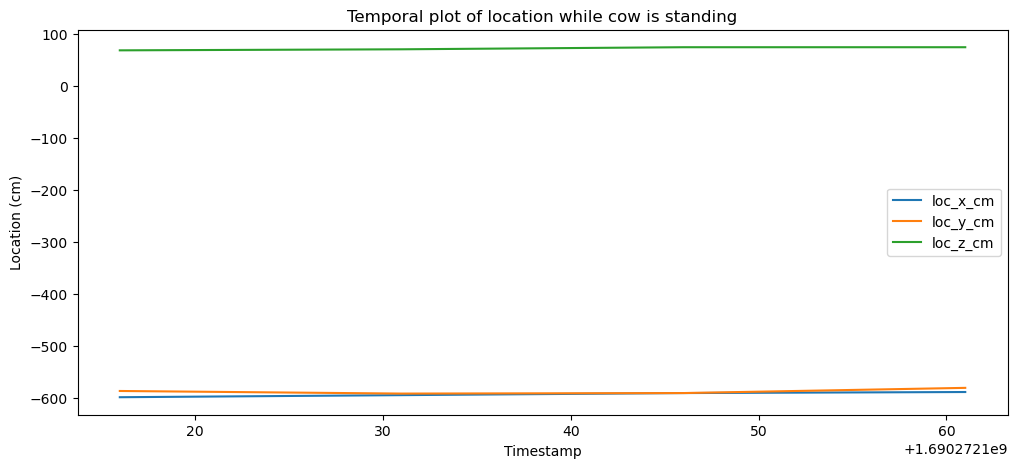

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

location_path = r"C:\Users\rouat\Desktop\MMcows\Datasets\visual_data\visual_data\visual_location\C01\C01_0725.csv"
behavior_path = r"C:\Users\rouat\Desktop\MMcows\Datasets\visual_data\visual_data\behavior_labels\individual\C01_0725.csv"

df_location = pd.read_csv(location_path)
df_behavior = pd.read_csv(behavior_path)

# Fusionner sur 'timestamp'
df = pd.merge(df_location, df_behavior[['timestamp', 'behavior']], on='timestamp', how='inner')

walking_indices = df[df['behavior'] == 1].index

if not walking_indices.empty:
    start_idx = walking_indices[0]
    
    end_idx = start_idx
    while end_idx + 1 < len(df) and df.loc[end_idx + 1, 'behavior'] == 1:
        end_idx += 1
    
    walking_sample = df.loc[start_idx:end_idx]
    
    print(f"Walking interval length: {len(walking_sample)} rows")
    
    #  Tracer
    plt.figure(figsize=(12, 5))
    plt.plot(walking_sample['timestamp'], walking_sample['loc_x_cm'], label='loc_x_cm')
    plt.plot(walking_sample['timestamp'], walking_sample['loc_y_cm'], label='loc_y_cm')
    plt.plot(walking_sample['timestamp'], walking_sample['loc_z_cm'], label='loc_z_cm')
    plt.title('Temporal plot of location while cow is walking')
    plt.xlabel('Timestamp')
    plt.ylabel('Location (cm)')
    plt.legend()
    plt.show()
else:
    print("No walking interval found.")

standing_indices = df[df['behavior'] == 2].index

if not standing_indices.empty:
    start_idx = standing_indices[0]
    
    end_idx = start_idx
    while end_idx + 1 < len(df) and df.loc[end_idx + 1, 'behavior'] == 2:
        end_idx += 1
    
    standing_sample = df.loc[start_idx:end_idx]
    
    print(f"Standing interval length: {len(standing_sample)} rows")
    
    # ➜ Tracer
    plt.figure(figsize=(12, 5))
    plt.plot(standing_sample['timestamp'], standing_sample['loc_x_cm'], label='loc_x_cm')
    plt.plot(standing_sample['timestamp'], standing_sample['loc_y_cm'], label='loc_y_cm')
    plt.plot(standing_sample['timestamp'], standing_sample['loc_z_cm'], label='loc_z_cm')
    plt.title('Temporal plot of location while cow is standing')
    plt.xlabel('Timestamp')
    plt.ylabel('Location (cm)')
    plt.legend()
    plt.show()
else:
    print("No standing interval found.")


Walking interval length: 2 rows
Walking interval duration: 0 days 00:00:15


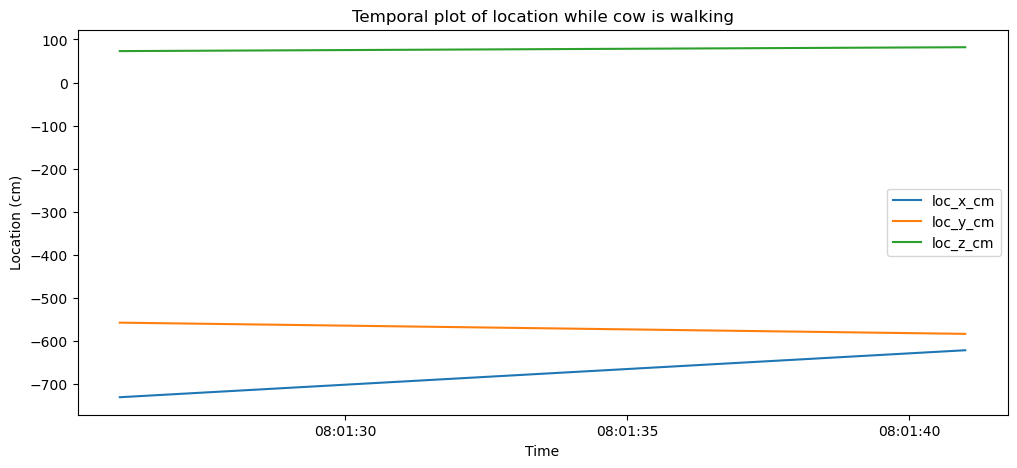

Standing interval length: 4 rows
Standing interval duration: 0 days 00:00:45


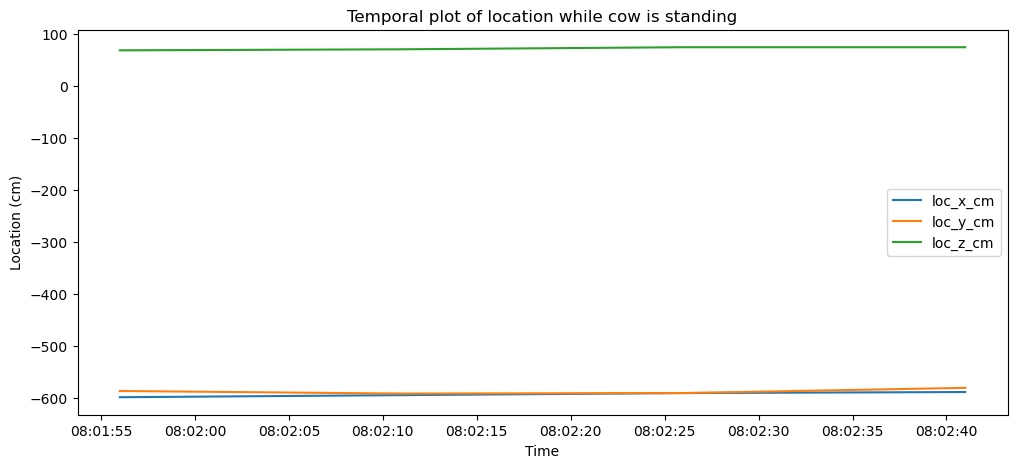

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

location_path = r"C:\Users\rouat\Desktop\MMcows\Datasets\visual_data\visual_data\visual_location\C01\C01_0725.csv"
behavior_path = r"C:\Users\rouat\Desktop\MMcows\Datasets\visual_data\visual_data\behavior_labels\individual\C01_0725.csv"

df_location = pd.read_csv(location_path)
df_behavior = pd.read_csv(behavior_path)

# Fusionner sur 'timestamp'
df = pd.merge(df_location, df_behavior[['timestamp', 'behavior']], on='timestamp', how='inner')

walking_indices = df[df['behavior'] == 1].index

if not walking_indices.empty:
    start_idx = walking_indices[0]
    end_idx = start_idx
    
    while end_idx + 1 < len(df) and df.loc[end_idx + 1, 'behavior'] == 1:
        end_idx += 1
    
    walking_sample = df.loc[start_idx:end_idx].copy()  

    
    walking_sample['datetime'] = pd.to_datetime(walking_sample['timestamp'], unit='s')

    
    duration = walking_sample['datetime'].iloc[-1] - walking_sample['datetime'].iloc[0]
    print(f"Walking interval length: {len(walking_sample)} rows")
    print(f"Walking interval duration: {duration}")

    #  Tracer
    plt.figure(figsize=(12, 5))
    plt.plot(walking_sample['datetime'], walking_sample['loc_x_cm'], label='loc_x_cm')
    plt.plot(walking_sample['datetime'], walking_sample['loc_y_cm'], label='loc_y_cm')
    plt.plot(walking_sample['datetime'], walking_sample['loc_z_cm'], label='loc_z_cm')
    plt.title('Temporal plot of location while cow is walking')
    plt.xlabel('Time')
    plt.ylabel('Location (cm)')
    plt.legend()
    plt.show()
else:
    print("No walking interval found.")

standing_indices = df[df['behavior'] == 2].index

if not standing_indices.empty:
    start_idx = standing_indices[0]
    end_idx = start_idx
    while end_idx + 1 < len(df) and df.loc[end_idx + 1, 'behavior'] == 2:
        end_idx += 1
    
    standing_sample = df.loc[start_idx:end_idx].copy()

    
    standing_sample['datetime'] = pd.to_datetime(standing_sample['timestamp'], unit='s')

    
    duration = standing_sample['datetime'].iloc[-1] - standing_sample['datetime'].iloc[0]
    print(f"Standing interval length: {len(standing_sample)} rows")
    print(f"Standing interval duration: {duration}")

    #  Tracer
    plt.figure(figsize=(12, 5))
    plt.plot(standing_sample['datetime'], standing_sample['loc_x_cm'], label='loc_x_cm')
    plt.plot(standing_sample['datetime'], standing_sample['loc_y_cm'], label='loc_y_cm')
    plt.plot(standing_sample['datetime'], standing_sample['loc_z_cm'], label='loc_z_cm')
    plt.title('Temporal plot of location while cow is standing')
    plt.xlabel('Time')
    plt.ylabel('Location (cm)')
    plt.legend()
    plt.show()
else:
    print("No standing interval found.")


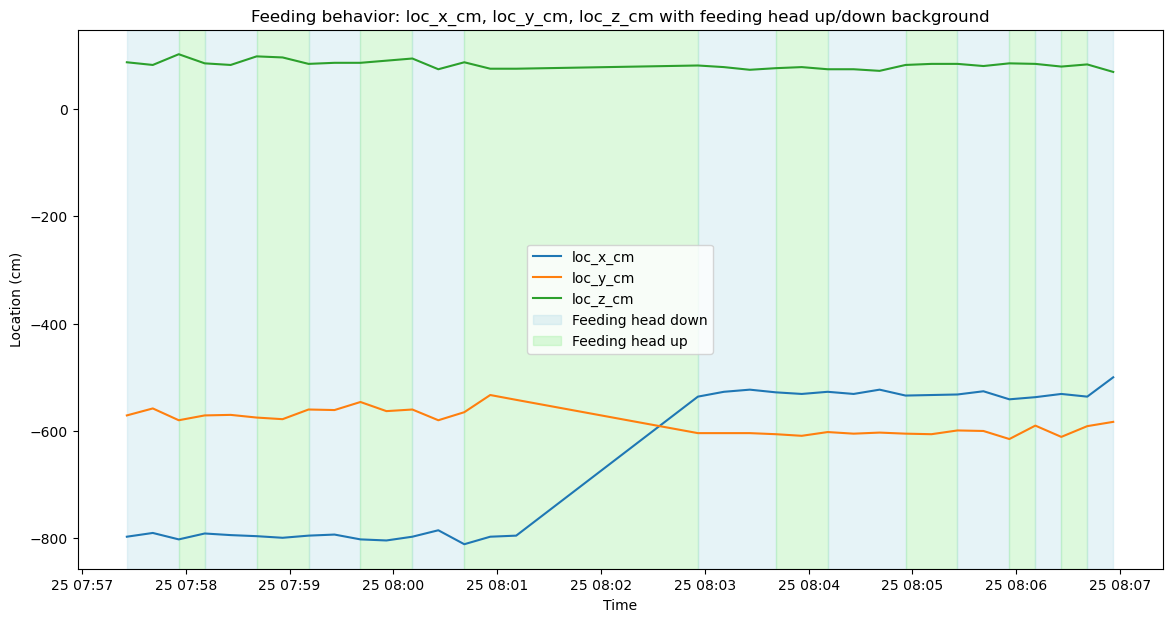

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

location_path = r"C:\Users\rouat\Desktop\MMcows\Datasets\visual_data\visual_data\visual_location\C01\C01_0725.csv"
behavior_path = r"C:\Users\rouat\Desktop\MMcows\Datasets\visual_data\visual_data\behavior_labels\individual\C01_0725.csv"

df_location = pd.read_csv(location_path)
df_behavior = pd.read_csv(behavior_path)

# Fusionner sur 'timestamp'
df = pd.merge(df_location, df_behavior[['timestamp', 'behavior']], on='timestamp', how='inner')

df['datetime'] = pd.to_datetime(df['timestamp'], unit='s')

feeding_df = df[df['behavior'].isin([3, 4])].copy()

# Identifier les changements de comportement
feeding_df['behavior_shift'] = feeding_df['behavior'].shift()
feeding_df['change'] = feeding_df['behavior'] != feeding_df['behavior_shift']

change_indices = feeding_df.index[feeding_df['change'] == True]

if len(change_indices) >= 2:
    start_idx = change_indices[0]
    end_idx = start_idx + 50 
    feeding_sample = feeding_df.loc[start_idx:end_idx].copy()

    plt.figure(figsize=(14, 7))
    # Tracer loc_x_cm, loc_y_cm, loc_z_cm
    plt.plot(feeding_sample['datetime'], feeding_sample['loc_x_cm'], label='loc_x_cm')
    plt.plot(feeding_sample['datetime'], feeding_sample['loc_y_cm'], label='loc_y_cm')
    plt.plot(feeding_sample['datetime'], feeding_sample['loc_z_cm'], label='loc_z_cm')

    # Colorer l'arrière-plan selon le comportement
    current_behavior = None
    start_time = None
    for idx, row in feeding_sample.iterrows():
        if current_behavior is None:
            current_behavior = row['behavior']
            start_time = row['datetime']
        elif row['behavior'] != current_behavior:
            end_time = row['datetime']
            if current_behavior == 3:
                plt.axvspan(start_time, end_time, color='lightgreen', alpha=0.3, label='Feeding head up')
            elif current_behavior == 4:
                plt.axvspan(start_time, end_time, color='lightblue', alpha=0.3, label='Feeding head down')
            current_behavior = row['behavior']
            start_time = row['datetime']

    
    if current_behavior is not None:
        end_time = feeding_sample.iloc[-1]['datetime']
        if current_behavior == 3:
            plt.axvspan(start_time, end_time, color='lightgreen', alpha=0.3, label='Feeding head up')
        elif current_behavior == 4:
            plt.axvspan(start_time, end_time, color='lightblue', alpha=0.3, label='Feeding head down')

    plt.xlabel('Time')
    plt.ylabel('Location (cm)')
    plt.title('Feeding behavior: loc_x_cm, loc_y_cm, loc_z_cm with feeding head up/down background')
    
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())
    plt.show()

else:
    print("Not enough changes between head up and head down to create a small sample.")


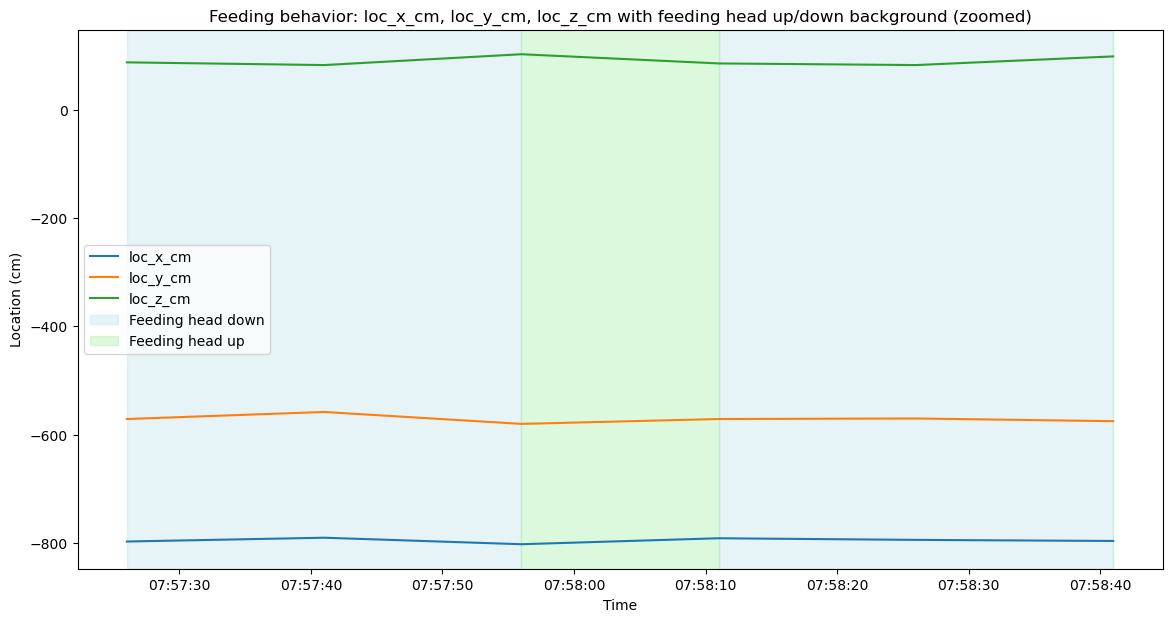

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

location_path = r"C:\Users\rouat\Desktop\MMcows\Datasets\visual_data\visual_data\visual_location\C01\C01_0725.csv"
behavior_path = r"C:\Users\rouat\Desktop\MMcows\Datasets\visual_data\visual_data\behavior_labels\individual\C01_0725.csv"

df_location = pd.read_csv(location_path)
df_behavior = pd.read_csv(behavior_path)

df = pd.merge(df_location, df_behavior[['timestamp', 'behavior']], on='timestamp', how='inner')
df['datetime'] = pd.to_datetime(df['timestamp'], unit='s')

feeding_df = df[df['behavior'].isin([3, 4])].copy()
feeding_df['behavior_shift'] = feeding_df['behavior'].shift()
feeding_df['change'] = feeding_df['behavior'] != feeding_df['behavior_shift']
change_indices = feeding_df.index[feeding_df['change'] == True]

if len(change_indices) >= 2:
    start_idx = change_indices[0]
    end_idx = start_idx + 5  
    
    feeding_sample = feeding_df.loc[start_idx:end_idx].copy()

    plt.figure(figsize=(14, 7))
    plt.plot(feeding_sample['datetime'], feeding_sample['loc_x_cm'], label='loc_x_cm')
    plt.plot(feeding_sample['datetime'], feeding_sample['loc_y_cm'], label='loc_y_cm')
    plt.plot(feeding_sample['datetime'], feeding_sample['loc_z_cm'], label='loc_z_cm')

    current_behavior = None
    start_time = None
    for idx, row in feeding_sample.iterrows():
        if current_behavior is None:
            current_behavior = row['behavior']
            start_time = row['datetime']
        elif row['behavior'] != current_behavior:
            end_time = row['datetime']
            color = 'lightgreen' if current_behavior == 3 else 'lightblue'
            plt.axvspan(start_time, end_time, color=color, alpha=0.3,
                        label='Feeding head up' if current_behavior == 3 else 'Feeding head down')
            current_behavior = row['behavior']
            start_time = row['datetime']

    if current_behavior is not None:
        end_time = feeding_sample.iloc[-1]['datetime']
        color = 'lightgreen' if current_behavior == 3 else 'lightblue'
        plt.axvspan(start_time, end_time, color=color, alpha=0.3,
                    label='Feeding head up' if current_behavior == 3 else 'Feeding head down')

    plt.xlabel('Time')
    plt.ylabel('Location (cm)')
    plt.title('Feeding behavior: loc_x_cm, loc_y_cm, loc_z_cm with feeding head up/down background (zoomed)')
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())
    plt.show()
else:
    print("Not enough changes between head up and head down to create a small sample.")


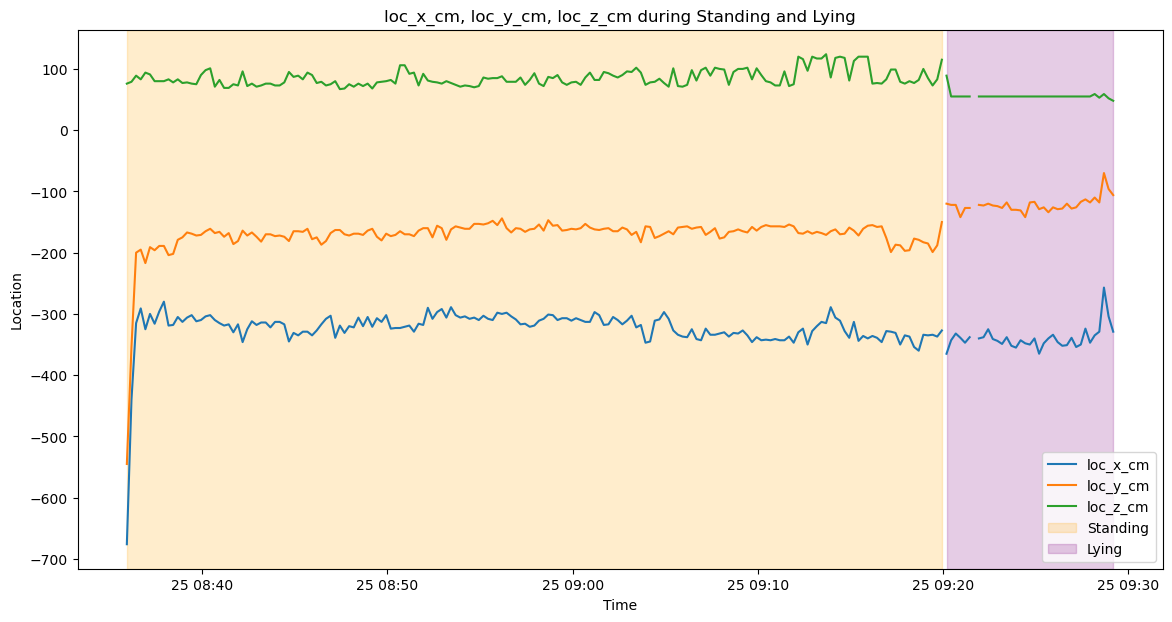

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

location_path = r"C:\Users\rouat\Desktop\MMcows\Datasets\visual_data\visual_data\visual_location\C01\C01_0725.csv"
behavior_path = r"C:\Users\rouat\Desktop\MMcows\Datasets\visual_data\visual_data\behavior_labels\individual\C01_0725.csv"

df_location = pd.read_csv(location_path)
df_behavior = pd.read_csv(behavior_path)

df = pd.merge(df_location, df_behavior[['timestamp', 'behavior']], on='timestamp', how='inner')
df['datetime'] = pd.to_datetime(df['timestamp'], unit='s')

# Trouver la première séquence continue de lying (7)
lying_indices = df[df['behavior'] == 7].index

if len(lying_indices) == 0:
    print("No lying behavior found.")
else:
    start_idx = lying_indices[0]
    end_idx = start_idx
    while end_idx + 1 < len(df) and df.loc[end_idx + 1, 'behavior'] == 7:
        end_idx += 1

    # Trouver la séquence continue précédente avec standing (2)
    prev_idx = start_idx - 1 if start_idx > 0 else None

    if prev_idx is None or df.loc[prev_idx, 'behavior'] != 2:
        print("No standing behavior immediately before lying.")
    else:
        prev_behavior = 2
        prev_start_idx = prev_idx
        while prev_start_idx - 1 >= 0 and df.loc[prev_start_idx - 1, 'behavior'] == prev_behavior:
            prev_start_idx -= 1

        # Extraire les deux séquences
        prev_seq = df.loc[prev_start_idx:prev_idx].copy()
        lying_seq = df.loc[start_idx:end_idx].copy()

        prev_seq['datetime'] = pd.to_datetime(prev_seq['timestamp'], unit='s')
        lying_seq['datetime'] = pd.to_datetime(lying_seq['timestamp'], unit='s')

        plt.figure(figsize=(14, 7))

        
        color_x = 'tab:blue'
        color_y = 'tab:orange'
        color_z = 'tab:green'

        # Tracer loc_x_cm, loc_y_cm, loc_z_cm 
        plt.plot(prev_seq['datetime'], prev_seq['loc_x_cm'], label='loc_x_cm', color=color_x)
        plt.plot(prev_seq['datetime'], prev_seq['loc_y_cm'], label='loc_y_cm', color=color_y)
        plt.plot(prev_seq['datetime'], prev_seq['loc_z_cm'], label='loc_z_cm', color=color_z)

        plt.plot(lying_seq['datetime'], lying_seq['loc_x_cm'], color=color_x)
        plt.plot(lying_seq['datetime'], lying_seq['loc_y_cm'], color=color_y)
        plt.plot(lying_seq['datetime'], lying_seq['loc_z_cm'], color=color_z)

        # Colorer les fonds différemment
        plt.axvspan(prev_seq['datetime'].iloc[0], prev_seq['datetime'].iloc[-1], color='orange', alpha=0.2, label='Standing')
        plt.axvspan(lying_seq['datetime'].iloc[0], lying_seq['datetime'].iloc[-1], color='purple', alpha=0.2, label='Lying')

        plt.xlabel('Time')
        plt.ylabel('Location')
        plt.title('loc_x_cm, loc_y_cm, loc_z_cm during Standing and Lying')
        handles, labels = plt.gca().get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        plt.legend(by_label.values(), by_label.keys())
        plt.show()
